# Voice Quality Analyzer

### Импортируем нужные модули

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pydub.generators import Sine
from pydub import AudioSegment

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Создаем две синусоиды з частотами 300Hz и 600Hz

In [3]:
sine_wave_300 = Sine(freq=300)
sine_wave_600 = Sine(freq=600)

### Можем прослушать полученный "звук"

#### Волна с частотой 300Hz

In [4]:
audio_segment_sine_wave_300 = sine_wave_300.to_audio_segment(duration=1000.0*5)
audio_segment_sine_wave_300

#### Волна с частотой 600Hz

In [5]:
audio_segment_sine_wave_600 = sine_wave_600.to_audio_segment(duration=1000.0*5)
audio_segment_sine_wave_600

### Реализуем функцию для генерации комбинации двух синусоид (а так же общий случай для множества входных синусоид)

In [6]:
def gen_comb_of_two_sine(first_sine=Sine(freq=300), second_sine=Sine(freq=600), first_duration=1000, second_duration=1000, export_in_wav=False):
    """
    Parameters:
        first_sine: pydub.generators.Sine, default: Sine(freq=300)
            This is first sine wave.
            
        second_sine: pydub.generators.Sine, default: Sine(freq=600)
            This is first sine wave.
            
        first_duration: int, float, default: 1000 ms
            Audio duration in seconds.
            
        second_duration: int, float, default: 1000 ms
            Audio duration in seconds.
            
        export_in_wav: bool, , default: False
            Specifies is a combination_of_two_sine should be
            saved in current folder with name "combination_of_two_sine.wav".
            
    Returns:
        combination_of_two_sine: pydub.audio_segment.AudioSegment
            This is combination of two sine wave.
            
    """
    
    
    audio_segment_first = first_sine.to_audio_segment(duration=np.abs(first_duration))
    audio_segment_second = second_sine.to_audio_segment(duration=np.abs(second_duration))
    
    combination_of_two_sine = audio_segment_first + audio_segment_second
    
    if export_in_wav:
        combination_of_two_sine.export('output/Custom signal generator output/combination_of_two_sine.wav', format='wav')
        
    return combination_of_two_sine

In [8]:
def gen_comb_of_sine(*args, export_in_wav=False):
    """
    Parameters:
        *args containes tuples pair like (Sine, duration).
        
        Sine: pydub.generators.Sine
            This is one of sine waves.
            
        duration: int, float
            This is duration of current sine wave.
            
        export_in_wav: bool, default: False
        Specifies is a combination_of_two_sine should be
            saved in current folder with name "combination_of_two_sine.wav".
            
    Returns:
        combination_of_sines: pydub.audio_segment.AudioSegment
            This is combination of sine waves.
            
    """
    combination_of_sines = AudioSegment.empty()
    for i in args:
        combination_of_sines += i[0].to_audio_segment(duration=np.abs(i[1]))
        
    if export_in_wav:
        combination_of_sines.export('output/Custom signal generator output/combination_of_sines.wav', format='wav')
        
    return combination_of_sines

#### Результат роботы функции для генерации комбинации двух волн

In [9]:
gen_comb_of_two_sine(export_in_wav=True)

In [10]:
gen_comb_of_two_sine(first_sine=Sine(50), second_sine=Sine(75), second_duration=5000, first_duration=5000, export_in_wav=True)

#### Результат роботы функции для генерации комбинации множества волн

In [11]:
gen_comb_of_sine((Sine(300), 1000), (Sine(600), 1000), (Sine(300), 1000), export_in_wav=True)

### Реализуем функцию для генерации звуковой дорожки определенной длинный и формата

#### Импортируем аудио-книгну

In [12]:
audio_book_mp3 = AudioSegment.from_file("input/audiobook.mp3", format='mp3')

#### Функция генерации выходного файла определенной длинный и формата

In [13]:
def voice_signal_generator(audio, duration=1000*2*60, filename='output/Voice signal generator output/output.wav'):
    """
    Parameters:
        audio: pydub.audio_segment.AudioSegment
            This is audio file.
            
        duration: int, float, default: 1000*2*60 ms
            This is duration of output audio file.
            
        filename: str, default: output.wav
            This is name of output file.
            
    """
    audio_slice = None
    if len(audio) < duration + 1:
        audio_slice = audio
    else:
        bound = np.random.randint(low=duration, high=len(audio)-duration-1)
        audio_slice = audio[bound:bound+duration]
    audio_slice.export(filename, format=filename.split('.')[-1])

In [14]:
voice_signal_generator(audio_book_mp3)

#### Откроем полученный файл и прослушаем результат

In [15]:
audio_book_output = AudioSegment.from_file("output/Voice signal generator output/output.wav", format='wav')

In [16]:
audio_book_output

#### Построим график для файла output.wav на интервале от 0:01:000 до 0:01:050 секунд

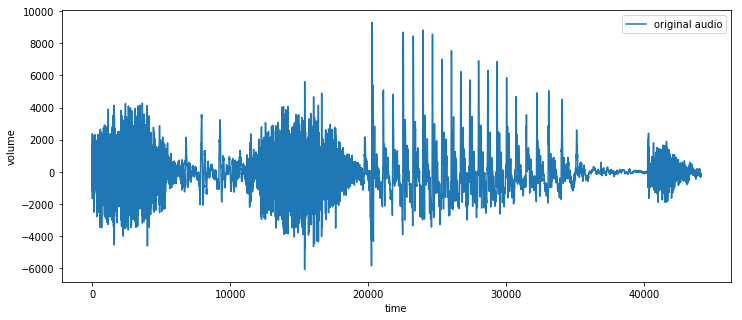

In [17]:
plt.figure(figsize=(12,5))

plt.plot(audio_book_output[1000:1500].get_array_of_samples(), label='original audio')

plt.xlabel('time')
plt.ylabel('volume')
plt.legend()

### Реализуем функцию, которая будет трансформировать входной файл wav-файл в 64Kbps *.mp3, а потом обратно в *.wav

In [18]:
def signal_transformer(audio, filename='output/Sound transformer output/output_transform', bitrate='64k'):
    """
    Parameters:
        audio: pydub.audio_segment.AudioSegment
            This is audio file.
            
        filename: str, default: output.wav
            This is name of output file.
            
        bitrate: str, default: '64k'
            This is bitrate of output file.
            
    """
    audio.export('output/Sound transformer output/Buf files/to_mp3.mp3', format='mp3', bitrate=bitrate)
    to_wav = AudioSegment.from_file('output/Sound transformer output/Buf files/to_mp3.mp3', format='mp3')
    to_wav.export(filename + '.wav', format='wav')

#### Применим эту функцию для полученной дорожки с прошлого пункта

In [19]:
signal_transformer(audio_book_output)

#### Откроем полученный файл и прослушаем результат

In [20]:
audio_book_output_transform = AudioSegment.from_file("output/Sound transformer output/output_transform.wav", format='wav')

In [21]:
audio_book_output_transform

+ Заметно, что качество звука стало чуть хуже

#### Построим график для файла output_transform.wav на интервале от 0:01:000 до 0:01:050 секунд

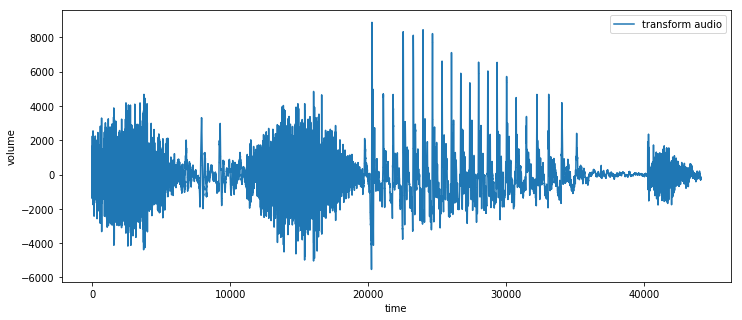

In [22]:
plt.figure(figsize=(12,5))

plt.plot(audio_book_output_transform[1000:1500].get_array_of_samples(), label='transform audio')

plt.xlabel('time')
plt.ylabel('volume')
plt.legend()

#### Построим график с наложением звука до превращения и после на интервале от 0:01:000 до 0:01:050 секунд

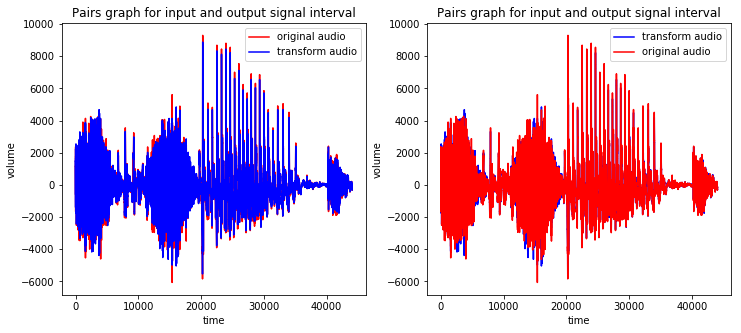

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot(audio_book_output[1000:1500].get_array_of_samples(), color='red', label='original audio')
ax1.plot(audio_book_output_transform[1000:1500].get_array_of_samples(), color='blue', label='transform audio')
ax1.set_xlabel('time')
ax1.set_ylabel('volume')
ax1.set_title('Pairs graph for input and output signal interval')
ax1.legend()

ax2.plot(audio_book_output_transform[1000:1500].get_array_of_samples(), color='blue', label='transform audio')
ax2.plot(audio_book_output[1000:1500].get_array_of_samples(), color='red', label='original audio')
ax2.set_xlabel('time')
ax2.set_ylabel('volume')
ax2.set_title('Pairs graph for input and output signal interval')
ax2.legend()

+ Видно, что график слегка преобразился (изменилось положение локальных пиков)